<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 5
#### Lugano Damian

-------------------------

### Consigna

 1. Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

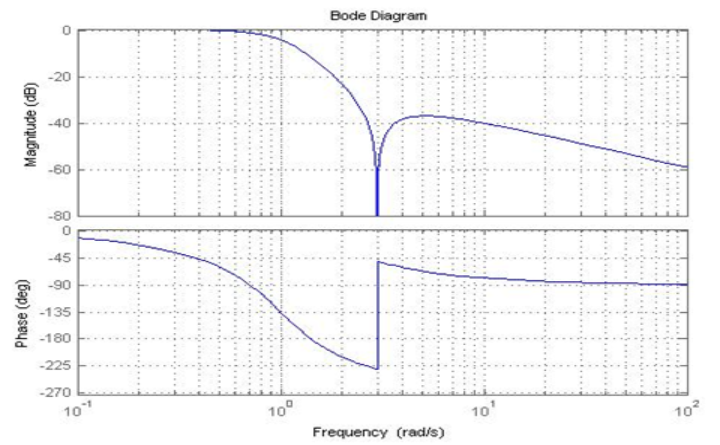

a. Determine la expresión de H(s) del filtro pasa-altos normalizado 

b. Realizar el diagrama de polos y ceros de H(s)                                             

c. Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

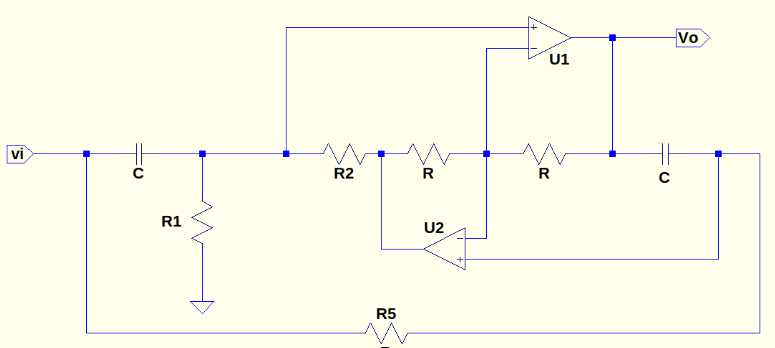

d. Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

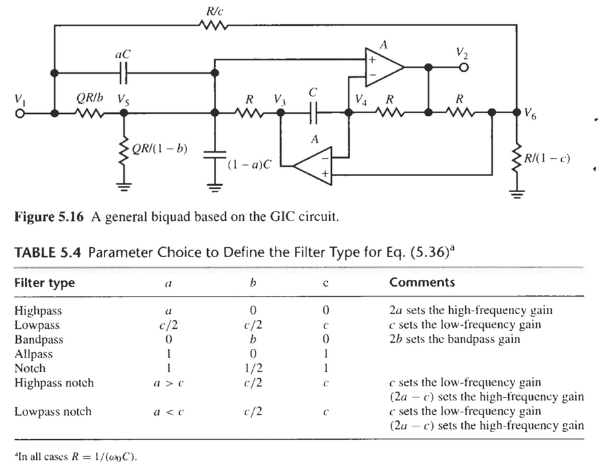


#### <u> Condiciones de participación </u>

+ Desarrollo conceptual
+ Simulación numérica
+ Simulación circuital

------------------------


### Desarrollo

<u>a) b) y c)</u>

In [2]:
from IPython.display import IFrame
IFrame("./docs/TS5abc.pdf", width=950, height=1000)

### Simulación

#### Simulación numérica en python

In [3]:
# --------- Imports---------------
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [4]:
# --------------- Plantilla normalizada del filtro pasa bajos prototipo ------------------

wc=1
wz=3
n=3 #Orden

#### Transferencia factorizada y parametrizada del pasa bajo prototipo Butter

<IPython.core.display.Math object>

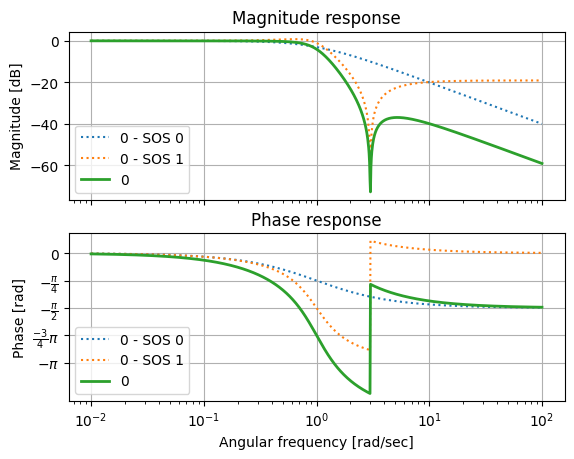

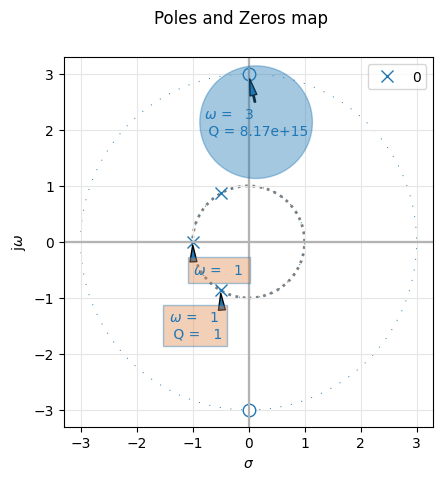

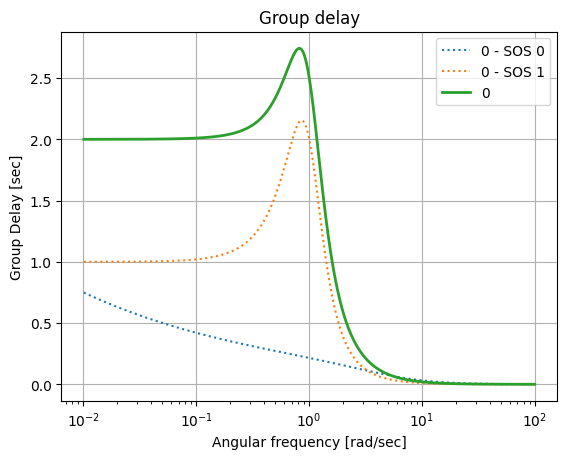

In [5]:
#--------------- Filtro pasa bajos prototipo Butterworth ----------------------

z,p,k = sig.buttap (n)
N, D = sig.zpk2tf(z, p, k)

N=[1/(wz**2), 0, 1] #Agrego los ceros de transmision

print_subtitle('Transferencia factorizada y parametrizada del pasa bajo prototipo Butter')
sos_lp = tf2sos_analog(N, D)
sos_lp[sos_lp < 1e-6] = 0.0
pretty_print_SOS(sos_lp)

analyze_sys(sos_lp)

#### Transferencia factorizada y parametrizada de filtro pasa alto butter

<IPython.core.display.Math object>

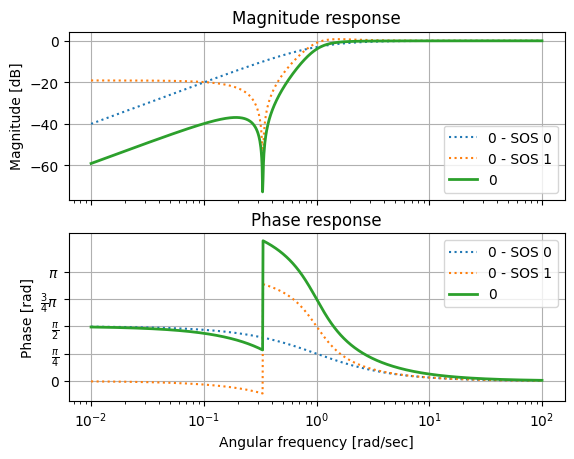

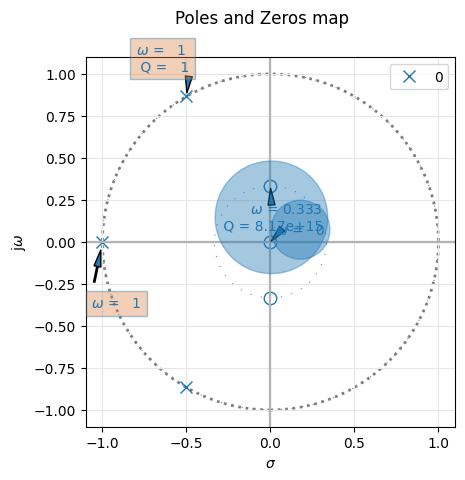

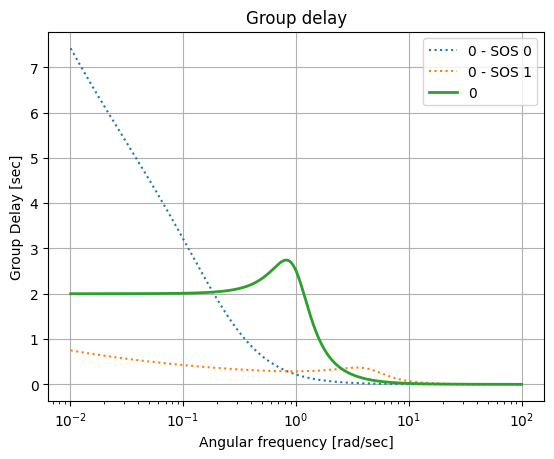

In [6]:
## ------------- Filtro butter Notch pasa altos ------------

N, D = sig.lp2hp(N, D) # LP -> HP

print_subtitle('Transferencia factorizada y parametrizada de filtro pasa alto butter')
sos_fhp = tf2sos_analog(N, D)
sos_fhp[sos_fhp < 1e-6] = 0.0
pretty_print_SOS(sos_fhp)

analyze_sys(sos_fhp)

#### Simulación Circuital en LTspice

<figure>
<center>
<img src=./pics/circuitoTS5.png width = "2000">
<figcaption> Figura 1. Circuito filtro Notch pasa-alto </figcaption>
</figure>

<figure>
<center>
<img src=./pics/simulacionTS5.png width = "2000">
<figcaption> Figura 2. Simulación filtro Notch pasa-alto </figcaption>
</figure>

#### Punto d) - Conclusiones

La estructura sugerida y la estructura propuesta por el Schaumann son similares debido a que ambas usan el GIC para activar un inductor. Sin embargo, en el Schaumann el GIC se encuentra en su forma biquad más general, mientras que la estructura sugerida es con los parámetros a=1 ; b=0 y c=1. Sin embargo, la diferencia más importante es que en el circuito del Schaumann se asumen las resistencias R2 y R5 como iguales, lo que para el caso de una implementación Notch pasa-altos dicha diferencia es lo que permite imponer los ceros de transmisión en el eje jw.

<figure>
<center>
<img src=./pics/est_usada.png width = "1000">
<figcaption> Figura 3. Estructura GIC utilizada </figcaption>
</figure>

<figure>
<center>
<img src=./pics/est_sch.png width = "800">
<figcaption> Figura 4. Estructura GIC propuesta por el Schaumann(Cap 5.1, pag 216) </figcaption>
</figure>

Otra diferencia menos relevante es que en el GIC propuesto en la bibliografía el capacitor está en la posicion $Z_2$ en lugar de la posición $Z_4$ como en la estructura propuesta. En ambos casos, la impedancia de entrada del GIC no cambiaría ya que está dada por:

\begin{equation}
    Z_{in}=\frac{Z_1 \, Z_3 \, Z_5}{Z_2 \, Z_4}
\end{equation}

Sin embargo, se suele poner el capacitor en $Z_2$ por un tema de estabilidad del circuito, de manera que la etapa siguiente no modifique la impedancia del capacitor.